YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?

From Yvonee

Key predictors of higher touch frequency were
1. higher Relationship Satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [3]:
df['Id'] = np.arange(1, df.shape[0] + 1)
df.insert(0, 'Id', df.pop('Id'))

In [4]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'sex_options': {
        'Male': 0,
        'Female': 1,
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'Loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Separate households': 0,
        'Cohabiting': 1,
    },
    'work-options': {
        'Home': 0,
        'Part-time activity': 1,
        'Full time activity': 2,
    },
    'rel_sex-options': {
        'Different sex': 0,
        'Same sex': 1
    },
    'germany-options': {
        'East Germany': 0,
        'West Germany': 1,
    },
    'urbanization-options': {
        'Rural area': 0,
        'Town or suburb': 1,
        'City': 2,
    },
    'married-options': {
        'Not married': 0,
        'Married': 1,
    },
    'age_diff_options': {
        '> 10y. older partner': 3,
        '> 10y. younger partner': -3,
        '2-5y. older partner': 2,
        '2-5y. younger partner': -2,
        '6-10y. older partner': 1,
        '6-10y. younger partner': -1,
        'Same age': 0
    }
}

In [5]:
col_names = {
    # TOUCH-RELATED
    'omo15i1_w2b': 'Anchor Kiss Frequency',
    'omo15i2_w2b': 'Anchor Kiss Wish',
    'pomo15i1_w2b': 'Partner Kiss Frequency',
    'pomo15i2_w2b': 'Partner Kiss Wish',
    'omo16i1_w2b': 'Anchor Hold Frequency',
    'omo16i2_w2b': 'Anchor Hold Wish',
    'pomo16i1_w2b': 'Partner Hold Frequency',
    'pomo16i2_w2b': 'Partner Hold Wish',
    'omo17i1_w2b': 'Anchor Hug Frequency',
    'omo17i2_w2b': 'Anchor Hug Wish',
    'pomo17i1_w2b': 'Partner Hug Frequency',
    'pomo17i2_w2b': 'Partner Hug Wish',

    # SOCIODEMOGRAPHICS
    'sex': 'Anchor Sex',  # Female, Male, Diverse
    'psex': 'Partner Sex',  # Female, Male, Diverse
    'age': 'Anchor Age',
    'page': 'Partner Age',
    'workst': 'Anchor Work Status',  # Full-time activity, Part-time activity, Home
    'pworkst': 'Partner Work Status',  # Full-time activity, Part-time activity, Home
    'east': 'Anchor East',
    'peast': 'Partner East',
    'degurba': 'Anchor Urbanization',
    'pdegurba': 'Partner Urbanization',

    #PERSONALITY
    'extr': 'Anchor Extraversion',
    'pextr': 'Partner Extraversion',
    'agree': 'Anchor Agreeableness',
    'pagree': 'Partner Agreeableness',
    'consc': 'Anchor Conscientiousness',
    'pconsc': 'Partner Conscientiousness',
    'open': 'Anchor Openness',
    'popen': 'Partner Openness',
    'neur': 'Anchor Neuroticism',
    'pneur': 'Partner Neuroticism',
    'consv': 'Anchor Conservatism',
    'pconsv': 'Partner Conservatism',
    'god': 'Anchor Religiosity',
    'pgod': 'Partner Religiosity',

    #WELLBEING
    'depr': 'Anchor Depressiveness',
    'pdepr': 'Partner Depressiveness',
    'loneliness': 'Anchor Loneliness',
    'ploneliness': 'Partner Loneliness',
    'self': 'Anchor Self-esteem',
    'pself': 'Partner Self-esteem',
    'lifsat': 'Anchor Life Satisfaction',
    'plifsat': 'Partner Life Satisfaction',
    'health': 'Anchor Health',
    'phealth': 'Partner Health',

    #RELATIONSHIP
    'samesex': 'Relationship Sex',
    'reldur_class': 'Relationship Length',
    'married': 'Married',
    'cohab': 'Cohabitation',
    'nkidsliv_class': 'Kids',
    'relint': 'Anchor Communication Quality',
    'prelint': 'Partner Communication Quality',
    'relsat': 'Anchor Relationship Satisfaction',
    'prelsat': 'Partner Relationship Satisfaction',
    'confm': 'Anchor Conflict Management',
    'pconfm': 'Partner Conflict Management',
    'agediff_class': 'Age difference',
}

# Rename columns to ease understanding
df = df.rename(
    columns=col_names
)

In [6]:
df = df.drop([
    'reldur', 'tf_kiss', 'ptf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1).reset_index(
    drop=True)

In [7]:
n = df['Id'].count()
print('Initial sample size =', n)

Initial sample size = 7100


In [8]:
df = df.replace('No answer', np.nan, regex=True)
print(df.isna().mean() * 100)

Id                                    0.000000
Anchor Age                            0.000000
Partner Age                           0.000000
Anchor Work Status                    1.112676
Partner Work Status                   1.169014
Anchor Sex                            0.000000
Partner Sex                           0.000000
Relationship Sex                      0.000000
Relationship Length                   2.140845
Cohabitation                          0.000000
Kids                                  0.084507
Anchor Relationship Satisfaction      0.112676
Partner Relationship Satisfaction     0.070423
Anchor Communication Quality          3.760563
Partner Communication Quality        16.112676
Anchor Kiss Frequency                 0.000000
Anchor Hold Frequency                 0.000000
Anchor Hug Frequency                  0.000000
Anchor Kiss Wish                      2.352113
Anchor Hold Wish                      2.112676
Anchor Hug Wish                       1.971831
Partner Kiss 

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [9]:
# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor Relationship Satisfaction'] = df['Anchor Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner Relationship Satisfaction'] = df['Partner Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor Life Satisfaction'] = df['Anchor Life Satisfaction'].map(overall_options["satisfaction_options"])
df['Partner Life Satisfaction'] = df['Partner Life Satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor Sex'] = df['Anchor Sex'].map(overall_options["sex_options"])
df['Anchor Kiss Frequency'] = df['Anchor Kiss Frequency'].map(overall_options["omo_options"])
df['Anchor Hold Frequency'] = df['Anchor Hold Frequency'].map(overall_options["omo_options"])
df['Anchor Hug Frequency'] = df['Anchor Hug Frequency'].map(overall_options["omo_options"])
df['Anchor Kiss Wish'] = df['Anchor Kiss Wish'].map(overall_options["omo_options"])
df['Anchor Hold Wish'] = df['Anchor Hold Wish'].map(overall_options["omo_options"])
df['Anchor Hug Wish'] = df['Anchor Hug Wish'].map(overall_options["omo_options"])

df['Partner Sex'] = df['Partner Sex'].map(overall_options["sex_options"])
df['Partner Kiss Frequency'] = df['Partner Kiss Frequency'].map(overall_options["omo_options"])
df['Partner Hold Frequency'] = df['Partner Hold Frequency'].map(overall_options["omo_options"])
df['Partner Hug Frequency'] = df['Partner Hug Frequency'].map(overall_options["omo_options"])
df['Partner Kiss Wish'] = df['Partner Kiss Wish'].map(overall_options["omo_options"])
df['Partner Hold Wish'] = df['Partner Hold Wish'].map(overall_options["omo_options"])
df['Partner Hug Wish'] = df['Partner Hug Wish'].map(overall_options["omo_options"])

df['Relationship Length'] = df['Relationship Length'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor Loneliness'] = df['Anchor Loneliness'].map(overall_options['Loneliness_options'])
df['Partner Loneliness'] = df['Partner Loneliness'].map(overall_options['Loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])

df['Anchor Work Status'] = df['Anchor Work Status'].map(overall_options['work-options'])
df['Partner Work Status'] = df['Partner Work Status'].map(overall_options['work-options'])

df['Anchor East'] = df['Anchor East'].map(overall_options['germany-options'])
df['Partner East'] = df['Partner East'].map(overall_options['germany-options'])

df['Anchor Urbanization'] = df['Anchor Urbanization'].map(overall_options['urbanization-options'])
df['Partner Urbanization'] = df['Partner Urbanization'].map(overall_options['urbanization-options'])

df['Married'] = df['Married'].map(overall_options['married-options'])

df['Relationship Sex'] = df['Relationship Sex'].map(overall_options['rel_sex-options'])

df['Age difference'] = df['Age difference'].map(overall_options['age_diff_options'])

In [10]:
# Group anchor and partner by Age
for i in range(0, len(df)):
    if df['Anchor Age'][i] <= 20:
        df.loc[i, 'Anchor Age group'] = 1
    elif 20 < df['Anchor Age'][i] <= 30:
        df.loc[i, 'Anchor Age group'] = 2
    elif 30 < df['Anchor Age'][i] <= 40:
        df.loc[i, 'Anchor Age group'] = 3
    elif 40 < df['Anchor Age'][i] <= 50:
        df.loc[i, 'Anchor Age group'] = 4
    elif 50 < df['Anchor Age'][i]:
        df.loc[i, 'Anchor Age group'] = 5

for i in range(0, len(df)):
    if df['Partner Age'][i] <= 20:
        df.loc[i, 'Partner Age group'] = 1
    elif 20 < df['Partner Age'][i] <= 30:
        df.loc[i, 'Partner Age group'] = 2
    elif 30 < df['Partner Age'][i] <= 40:
        df.loc[i, 'Partner Age group'] = 3
    elif 40 < df['Partner Age'][i] <= 50:
        df.loc[i, 'Partner Age group'] = 4
    elif 50 < df['Partner Age'][i]:
        df.loc[i, 'Partner Age group'] = 5

In [11]:
# Calculate mean Frequency
df['Anchor Frequency of Touch'] = (df[['Anchor Kiss Frequency', 'Anchor Hold Frequency', 'Anchor Hug Frequency']].
                                   mean(axis=1))
df['Partner Frequency of Touch'] = (df[['Partner Kiss Frequency', 'Partner Hold Frequency', 'Partner Hug Frequency']].
                                    mean(axis=1))

# Calculate mean Wish
df['Anchor Wish for Touch'] = (df[['Anchor Kiss Wish', 'Anchor Hold Wish', 'Anchor Hug Wish']].
                               mean(axis=1))
df['Partner Wish for Touch'] = (df[['Partner Kiss Wish', 'Partner Hold Wish', 'Partner Hug Wish']].
                                mean(axis=1))

# Calculate individual differences
df['Anchor Kiss Difference'] = df['Anchor Kiss Wish'] - df['Anchor Kiss Frequency']
df['Anchor Hold Difference'] = df['Anchor Hold Wish'] - df['Anchor Hold Frequency']
df['Anchor Hug Difference'] = df['Anchor Hug Wish'] - df['Anchor Hug Frequency']

df['Partner Kiss Difference'] = df['Partner Kiss Wish'] - df['Partner Kiss Frequency']
df['Partner Hold Difference'] = df['Partner Hold Wish'] - df['Partner Hold Frequency']
df['Partner Hug Difference'] = df['Partner Hug Wish'] - df['Partner Hug Frequency']

In [12]:
df['Couple Frequency of Touch'] = (df[['Anchor Frequency of Touch', 'Partner Frequency of Touch']].
                                   mean(axis=1))
df['Couple Wish for Touch'] = (df[['Anchor Wish for Touch', 'Partner Wish for Touch']].
                               mean(axis=1))

In [13]:
df2 = df.copy()
# df2 = df2.dropna().reset_index(drop=True)
col_names = [
    'Anchor Kiss Frequency',
    'Anchor Kiss Wish',
    'Partner Kiss Frequency',
    'Partner Kiss Wish',
    'Anchor Hold Frequency',
    'Anchor Hold Wish',
    'Partner Hold Frequency',
    'Partner Hold Wish',
    'Anchor Hug Frequency',
    'Anchor Hug Wish',
    'Partner Hug Frequency',
    'Partner Hug Wish',
]
df2 = df2.dropna(subset=col_names).reset_index(drop=True)

df2 = df2[(df2['Anchor Age'] != -7) & (df['Partner Age'] != -7)].reset_index(drop=True)

In [14]:
n = df2['Id'].count()
print('Working sample size =', n)

Working sample size = 6799


In [15]:
df2['Anchor Difference of Touch'] = df2['Anchor Wish for Touch'] - df2['Anchor Frequency of Touch']
df2['Partner Difference of Touch'] = df2['Partner Wish for Touch'] - df2['Partner Frequency of Touch']
df2['Couple Difference of Touch'] = df2['Couple Wish for Touch'] - df2['Couple Frequency of Touch']

In [16]:
for i in range(0, len(df2)):
    if (df2['Anchor Difference of Touch'][i] == 0
            and df2['Partner Difference of Touch'][i] == 0):
        if 0 < df2['Anchor Frequency of Touch'][i] <= 2.5:
            df2.loc[i, 'SubGroup'] = 'Low Frequency Agreement'
        elif 2.5 < df2['Anchor Frequency of Touch'][i] <= 5:
            df2.loc[i, 'SubGroup'] = 'High Frequency Agreement'
        elif df2['Anchor Frequency of Touch'][i] == 0:
            df2.loc[i, 'SubGroup'] = 'Non-Touch Agreement'
    elif (df2['Anchor Difference of Touch'][i] > 0
          and df2['Partner Difference of Touch'][i] > 0):
        df2.loc[i, 'SubGroup'] = 'Deprived Agreement'
    elif (df2['Anchor Difference of Touch'][i] < 0
          and df2['Partner Difference of Touch'][i] < 0):
        df2.loc[i, 'SubGroup'] = 'Saturated Agreement'
    else:
        df2.loc[i, 'SubGroup'] = 'Disagreement'

In [17]:
df2['SubGroup'].value_counts()

SubGroup
Disagreement                3131
Deprived Agreement          1701
High Frequency Agreement    1509
Low Frequency Agreement      405
Saturated Agreement           45
Non-Touch Agreement            8
Name: count, dtype: int64

In [18]:
df2["Anchor Perception of Touch"] = "Aligned"
df2["Partner Perception of Touch"] = "Aligned"

temp1 = df2["Anchor Difference of Touch"]
df2.loc[temp1 > 0, "Anchor Perception of Touch"] = "Deprived"
df2.loc[temp1 < 0, "Anchor Perception of Touch"] = "Saturated"

temp2 = df2["Partner Difference of Touch"]
df2.loc[temp2 > 0, "Partner Perception of Touch"] = "Deprived"
df2.loc[temp2 < 0, "Partner Perception of Touch"] = "Saturated"

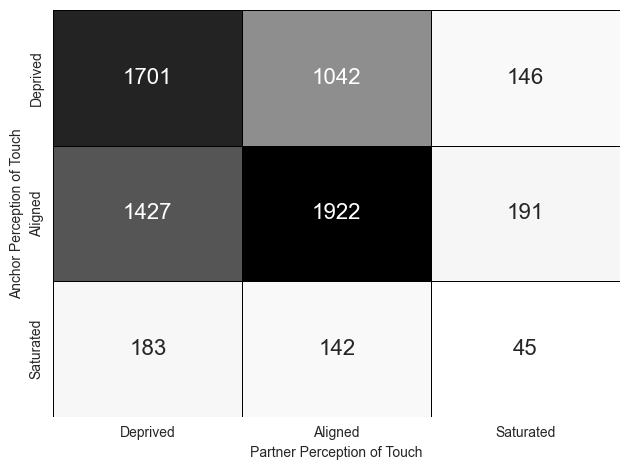

In [19]:
df2['Anchor Perception of Touch'] = pd.Categorical(df2['Anchor Perception of Touch'],
                                                   categories=['Deprived', 'Aligned', 'Saturated'], ordered=True)
df2['Partner Perception of Touch'] = pd.Categorical(df2['Partner Perception of Touch'],
                                                    categories=['Deprived', 'Aligned', 'Saturated'], ordered=True)

crosstab = pd.crosstab(df2['Anchor Perception of Touch'], df2['Partner Perception of Touch'])

greys_high_contrast = sns.color_palette("Greys", as_cmap=True)
sns.heatmap(
    data=crosstab,
    annot=True,
    cmap=greys_high_contrast,
    fmt='d',
    cbar=False,
    annot_kws={"fontsize": 16},
    linewidths=0.5,
    linecolor='black',
)

plt.tight_layout()
plt.savefig("output/img_bg/correlation/perception of touch.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [20]:
# # Calculate means for touch variables
# for i in range(0, len(df2)):
#     if df2['Anchor Frequency of Touch'][i] == 0:
#         df2.loc[i, 'Anchor Given (count)'] = '0x'
#     if 0 < df2['Anchor Frequency of Touch'][i] <= 1:
#         df2.loc[i, 'Anchor Given (count)'] = '1-5x'
#     if 1 < df2['Anchor Frequency of Touch'][i] <= 2:
#         df2.loc[i, 'Anchor Given (count)'] = '6-10x'
#     if 2 < df2['Anchor Frequency of Touch'][i] <= 3:
#         df2.loc[i, 'Anchor Given (count)'] = '11-20x'
#     if 3 < df2['Anchor Frequency of Touch'][i] <= 4:
#         df2.loc[i, 'Anchor Given (count)'] = '21-50x'
#     if 4 < df2['Anchor Frequency of Touch'][i] <= 5:
#         df2.loc[i, 'Anchor Given (count)'] = '> 50x'

In [21]:
# bins = [-float('inf'), 12, 17, 22, 26, float('inf')]
# labels = [1, 2, 3, 4, 5]
#
# cols_to_bin = ['Anchor Communication Quality', 'Partner Communication Quality']
#
# for col in cols_to_bin:
#     df2[col] = pd.cut(
#         df2[col],
#         bins=bins,
#         labels=labels,
#         right=True
#     )

CORRELATION MAPS

In [22]:
ct = pd.crosstab(df2['Anchor Perception of Touch'], df2['Partner Perception of Touch'])
ct

Partner Perception of Touch,Deprived,Aligned,Saturated
Anchor Perception of Touch,,,
Deprived,1701,1042,146
Aligned,1427,1922,191
Saturated,183,142,45


In [23]:
touch_factors = [
    # 'Anchor Frequency of Touch',
    # 'Anchor Wish for Touch',
    #
    # 'Partner Frequency of Touch',
    # 'Partner Wish for Touch',
    'Couple Frequency of Touch',
    'Couple Wish for Touch'
]

relationship_touch_factors = [
    # 'Anchor Difference of Touch',
    # 'Partner Difference of Touch',
    'Couple Difference of Touch'
]

individual_factors = [
    'Anchor Sex',
    'Anchor Age',
    'Anchor Work Status',
    'Anchor East',
    'Anchor Urbanization',

    'Partner Sex',
    'Partner Age',
    'Partner Work Status',
    'Partner East',
    'Partner Urbanization'
]

personality_factors = [
    'Anchor Extraversion',
    'Anchor Agreeableness',
    'Anchor Conscientiousness',
    'Anchor Openness',
    'Anchor Neuroticism',
    'Anchor Conservatism',
    'Anchor Religiosity',

    'Partner Extraversion',
    'Partner Agreeableness',
    'Partner Conscientiousness',
    'Partner Openness',
    'Partner Neuroticism',
    'Partner Conservatism',
    'Partner Religiosity',
]

wellbeing_factors = [
    'Anchor Depressiveness',
    'Anchor Loneliness',
    'Anchor Self-esteem',
    'Anchor Life Satisfaction',
    'Anchor Health',

    'Partner Depressiveness',
    'Partner Loneliness',
    'Partner Self-esteem',
    'Partner Life Satisfaction',
    'Partner Health',
]

relationship_factors = [
    'Relationship Sex',
    'Relationship Length',
    'Age difference',
    'Married',
    'Cohabitation',
    'Kids',

    'Anchor Communication Quality',
    'Anchor Relationship Satisfaction',
    'Anchor Conflict Management',

    'Partner Communication Quality',
    'Partner Relationship Satisfaction',
    'Partner Conflict Management',
]

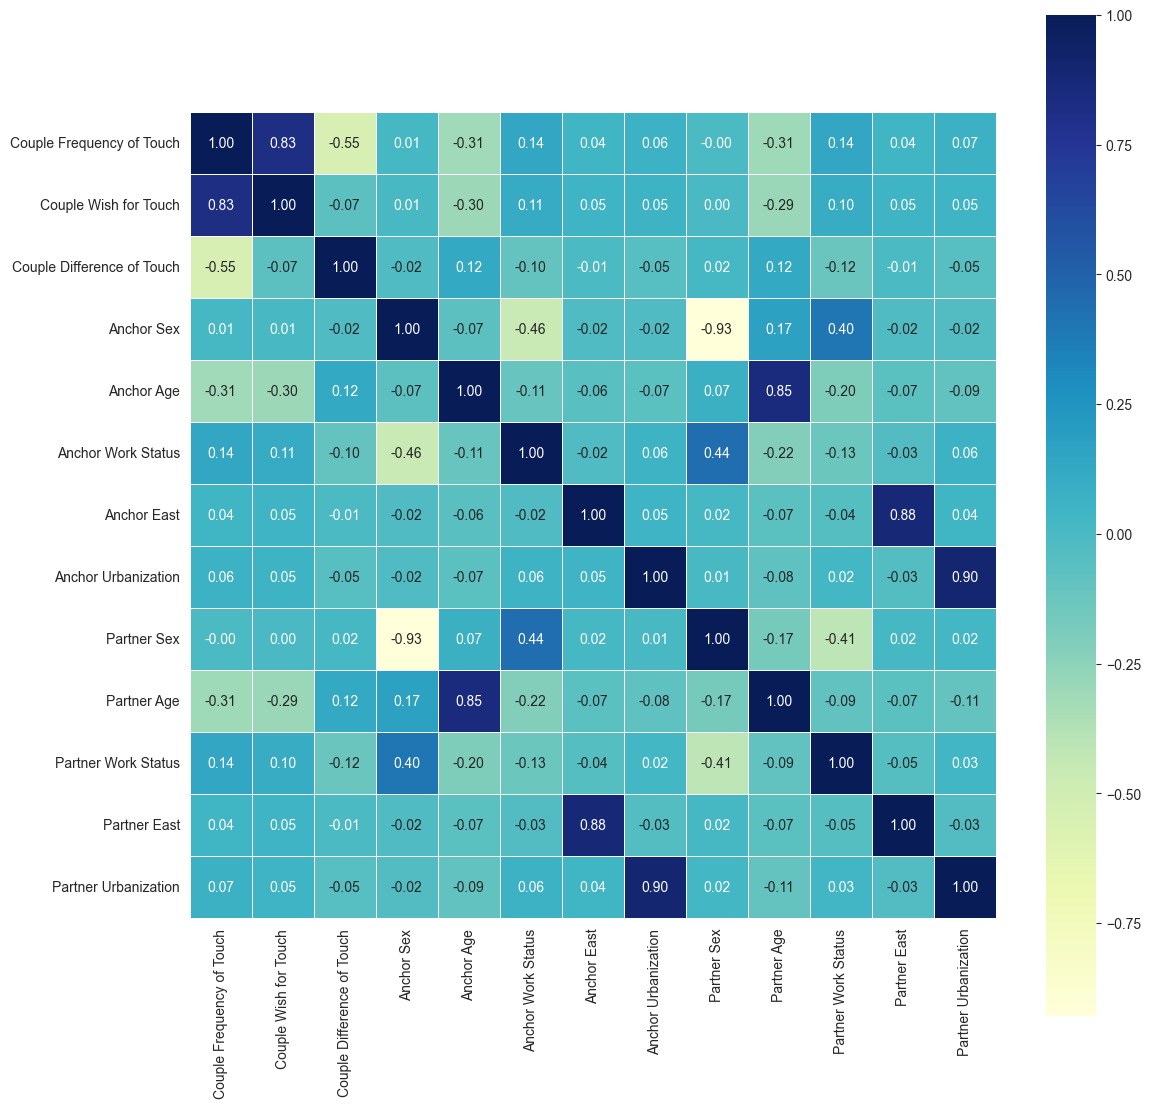

In [24]:
correlation = df2[
    touch_factors + relationship_touch_factors + individual_factors].corr(method='spearman')

num_vars = len(correlation.columns)
square_size = 1  # in inches, per cell

fig_width = num_vars * square_size
fig_height = num_vars * square_size

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.7,
            # vmin=-0.7,
            annot_kws={"size": 10},
            annot=True,
            square=True
            )

plt.grid(False)
plt.savefig('output/img_bg/correlation/individual_factors.png', dpi=350, transparent=False, bbox_inches='tight')

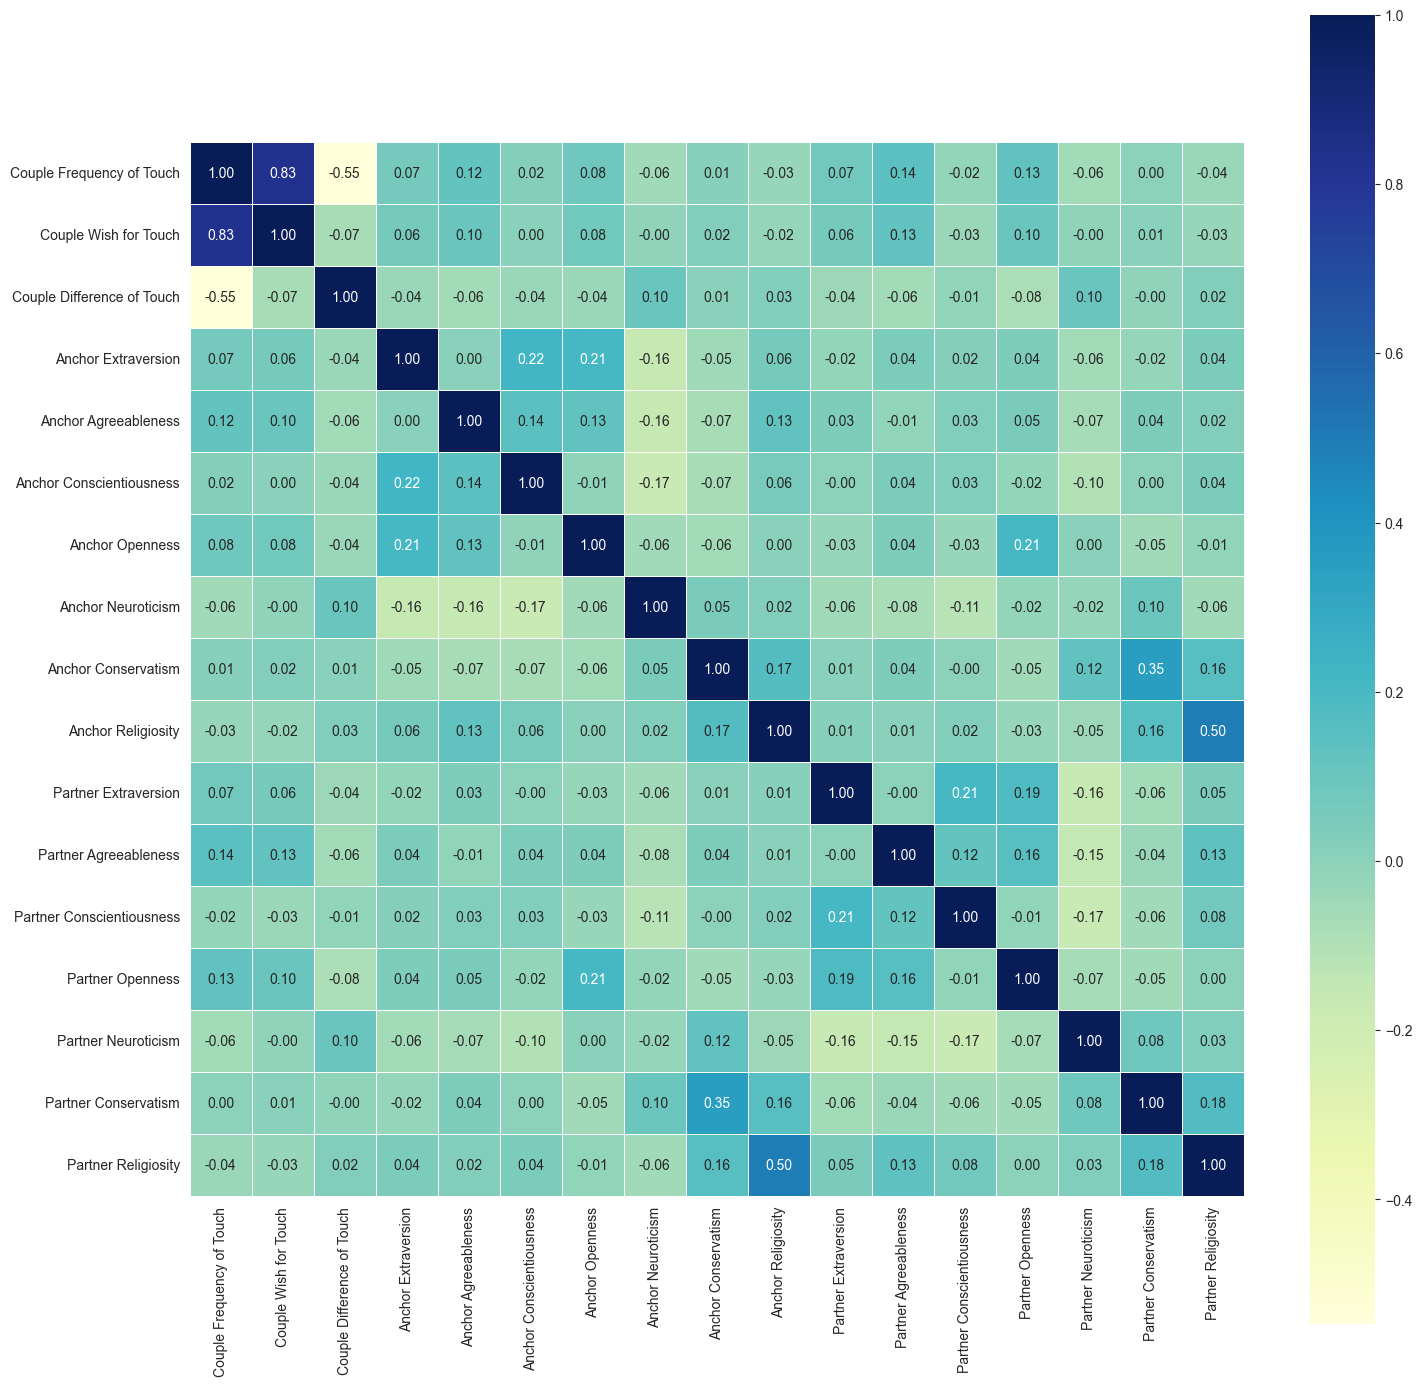

In [25]:
correlation = df2[
    touch_factors + relationship_touch_factors + personality_factors
    ].corr(method='spearman')

num_vars = len(correlation.columns)
square_size = 1  # in inches, per cell

fig_width = num_vars * square_size
fig_height = num_vars * square_size

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.7,
            # vmin=-0.7,
            annot_kws={"size": 10},
            annot=True,
            square=True
            )

plt.grid(False)
plt.savefig('output/img_bg/correlation/personality_factors.png', dpi=350, transparent=False, bbox_inches='tight')

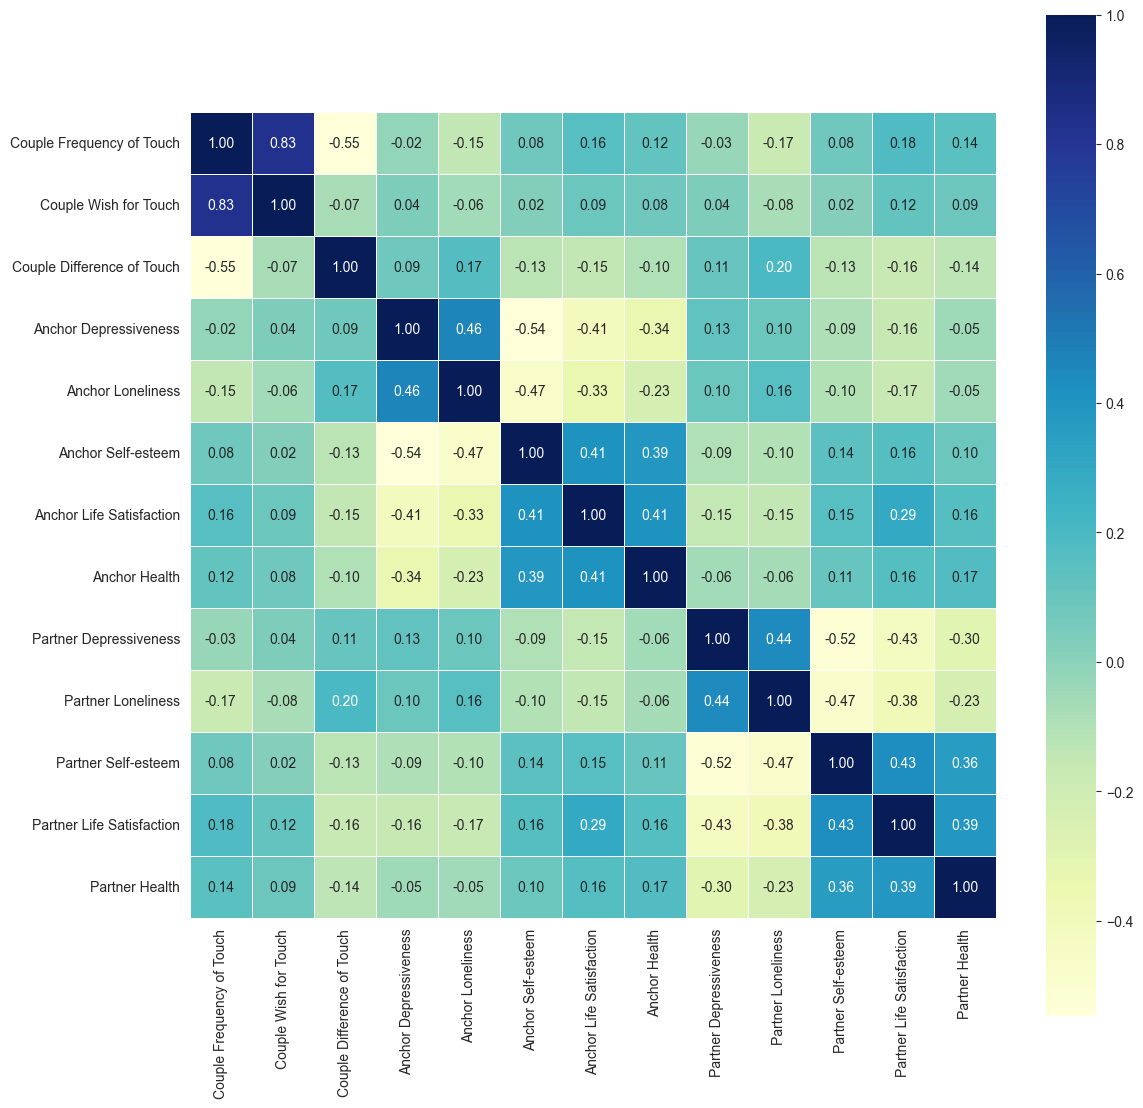

In [26]:
correlation = df2[
    touch_factors + relationship_touch_factors + wellbeing_factors
    ].corr(method='spearman')

num_vars = len(correlation.columns)
square_size = 1  # in inches, per cell

fig_width = num_vars * square_size
fig_height = num_vars * square_size

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.7,
            # vmin=-0.7,
            annot_kws={"size": 10},
            annot=True,
            square=True
            )
plt.grid(False)
plt.savefig('output/img_bg/correlation/wellbeing_factors.png', dpi=350, transparent=False, bbox_inches='tight')

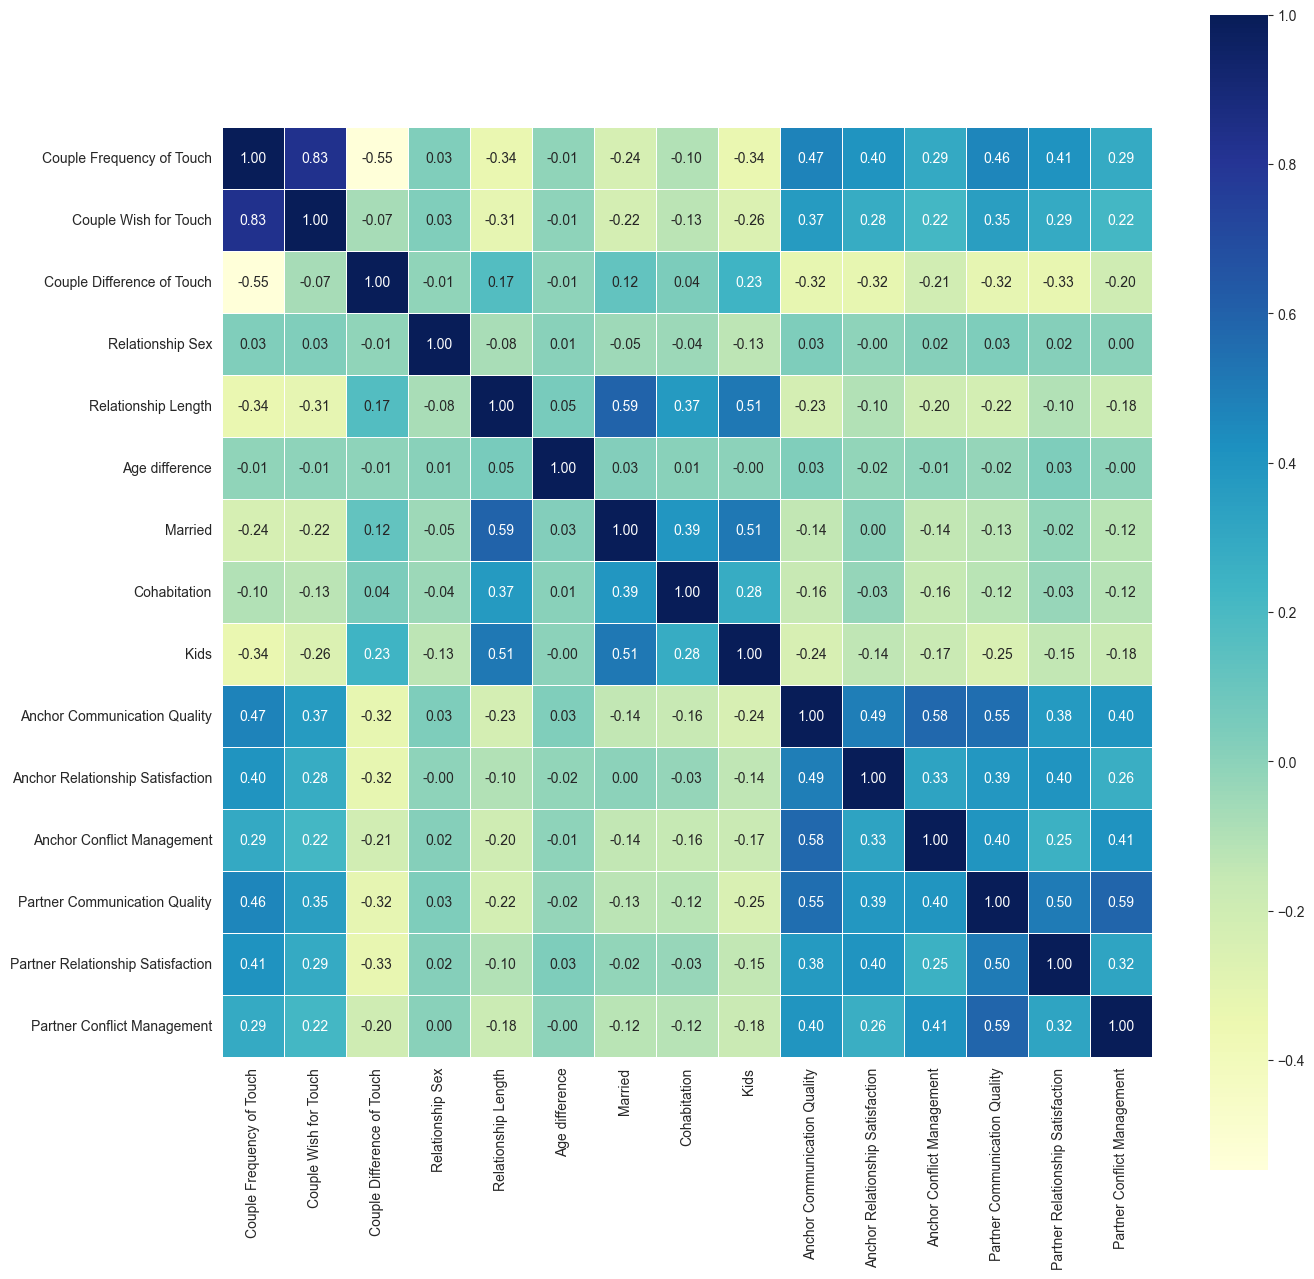

In [27]:
correlation = df2[
    touch_factors + relationship_touch_factors + relationship_factors
    ].corr(method='spearman')

num_vars = len(correlation.columns)
square_size = 1  # in inches, per cell

fig_width = num_vars * square_size
fig_height = num_vars * square_size

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.7,
            # vmin=-0.7,
            annot_kws={"size": 10},
            annot=True,
            square=True
            )

plt.savefig('output/img_bg/correlation/relationship_factors.png', dpi=350, transparent=False, bbox_inches='tight')

In [35]:
# Your variables of interest
cols = touch_factors + relationship_touch_factors + individual_factors + personality_factors + wellbeing_factors + relationship_factors

# Initialize matrices for correlation and p-values
corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
pval_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)

# Fill in the matrices
for i in range(len(cols)):
    for j in range(i, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        r, p = spearmanr(df2[col1], df2[col2], nan_policy='omit')
        corr_matrix.loc[col1, col2] = r
        corr_matrix.loc[col2, col1] = r
        pval_matrix.loc[col1, col2] = p
        pval_matrix.loc[col2, col1] = p

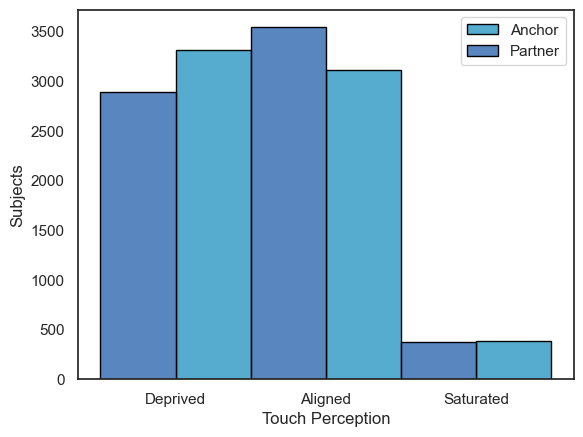

In [29]:
sns.set_theme(style='white')
df_melted = df2.melt(value_vars=['Anchor Perception of Touch', 'Partner Perception of Touch'],
                     var_name='Source', value_name='Value')

sns.histplot(data=df_melted, x='Value', hue='Source',
             element='bars',
             binwidth=0.5,
             palette=['#225ea8', '#1d91c0'],
             common_norm=False,
             multiple="dodge",
             linewidth=1,
             edgecolor='black',
             )
plt.grid(False)
plt.legend(loc='upper right', labels=["Anchor", "Partner"])
plt.xlabel("Touch Perception")
plt.ylabel("Subjects")
plt.savefig('output/img_bg/perception_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

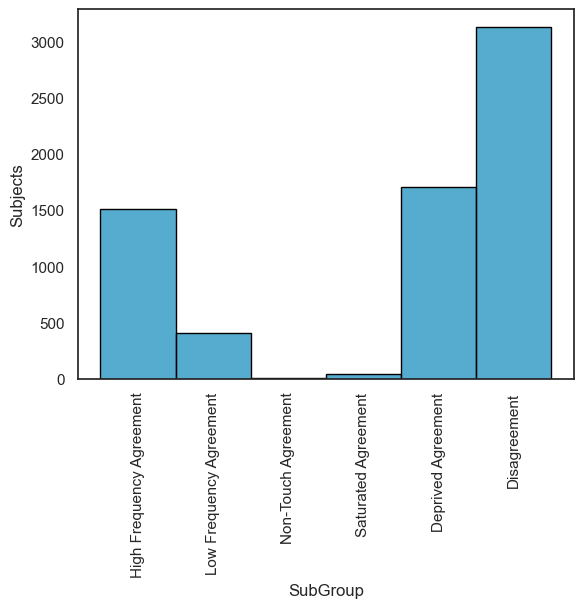

In [30]:
df2['SubGroup'] = pd.Categorical(df2['SubGroup'], ['High Frequency Agreement',
                                                   'Low Frequency Agreement',
                                                   'Non-Touch Agreement',
                                                   'Saturated Agreement',
                                                   'Deprived Agreement',
                                                   'Disagreement'])
sns.histplot(data=df2, x='SubGroup',
             element='bars',
             binwidth=0.5,
             color='#1d91c0',
             common_norm=False,
             multiple="dodge",
             linewidth=1,
             edgecolor='black',
             )
plt.grid(False)
plt.ylabel("Subjects")
plt.xticks(rotation=90, )
plt.savefig('output/img_bg/subgroup_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

In [31]:
df2['Group'] = 'Disagreement'

df2.loc[(
        (df2['Anchor Perception of Touch'] == 'Aligned') &
        (df2['Partner Perception of Touch'] == 'Aligned')
), 'Group'] = "Agreement"

df2.loc[(
        (
                (df2['Anchor Perception of Touch'] == 'Saturated') &
                (df2['Partner Perception of Touch'] == 'Saturated')
        ) | (
                (df2['Anchor Perception of Touch'] == 'Deprived') &
                (df2['Partner Perception of Touch'] == 'Deprived')
        )
), 'Group'] = "Concession"

In [32]:
group_agreement = df2[df2['Group'] == 'Agreement']
group_disagreement = df2[df2['Group'] == 'Disagreement']
group_concession = df2[df2['Group'] == 'Concession']

In [33]:
df2.to_csv('source/FReDA2.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'output/img_bg/healthy/individual_factors.png'

<Figure size 1400x800 with 0 Axes>

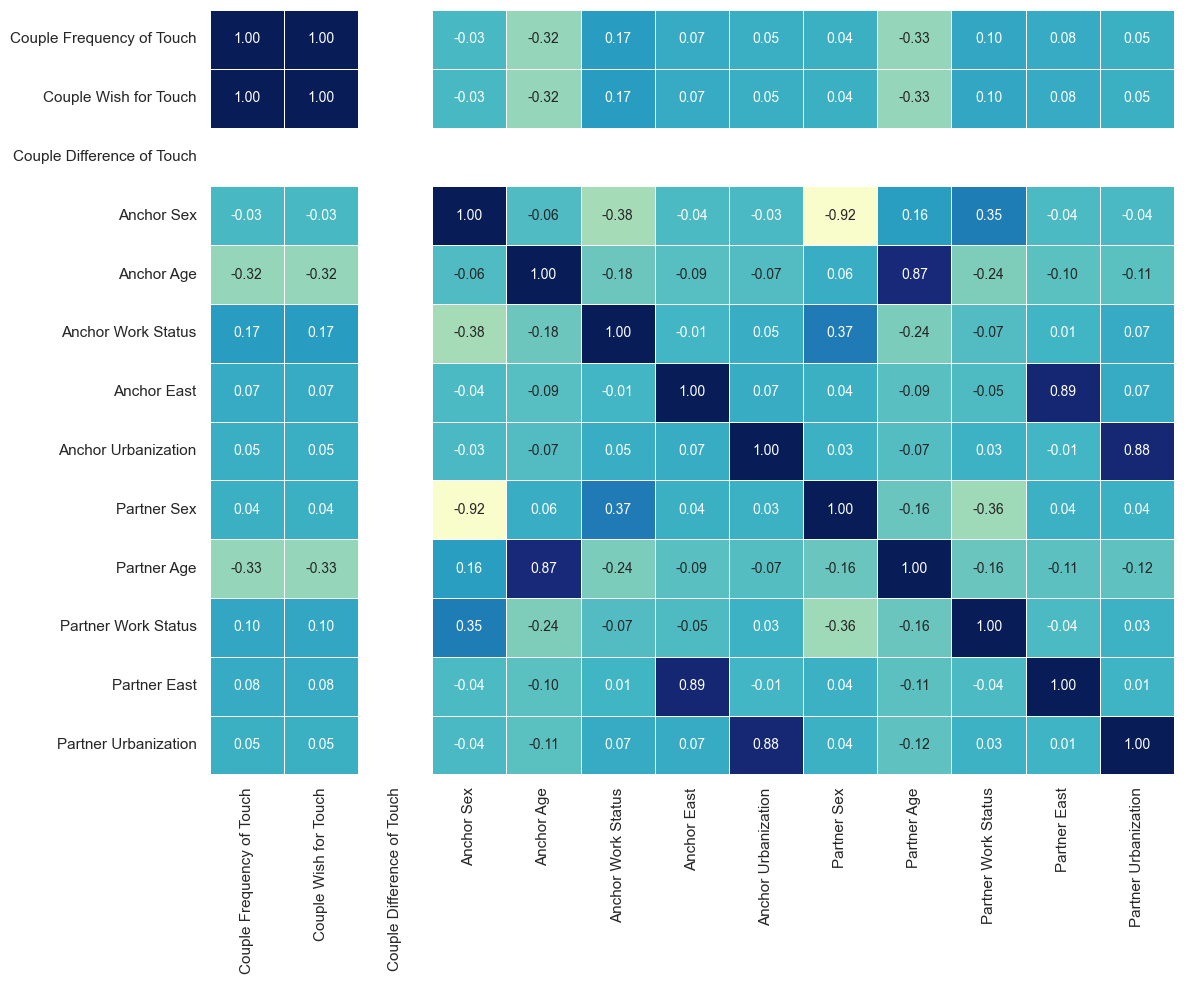

In [34]:
plt.figure(figsize=(14, 8))
# plt.tight_layout()

factors = [
    individual_factors,
    personality_factors,
    wellbeing_factors,
    relationship_factors
]

names = ['individual_factors', 'personality_factors', 'wellbeing_factors', 'relationship_factors']

for factor_group, name in zip(factors, names):
    correlation = group_agreement[
        touch_factors + relationship_touch_factors + factor_group
        ].corr(method='spearman')

    plt.figure(figsize=(12, 10))  # Adjust size as needed
    sns.heatmap(correlation,
                cmap='YlGnBu',
                fmt='.2f',
                linewidths=0.5,
                vmax=1,
                vmin=-1,
                annot_kws={"size": 10},
                annot=True,
                cbar=False)

    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f'output/img_bg/healthy/{name}.png',
                dpi=350,
                transparent=False,
                bbox_inches='tight')
    plt.close()

In [82]:
plt.figure(figsize=(14, 8))
# plt.tight_layout()

factors = [
    individual_factors,
    personality_factors,
    wellbeing_factors,
    relationship_factors
]

names = ['individual_factors', 'personality_factors', 'wellbeing_factors', 'relationship_factors']

for factor_group, name in zip(factors, names):
    correlation = group_disagreement[
        touch_factors + relationship_touch_factors + factor_group
        ].corr(method='spearman')

    plt.figure(figsize=(12, 10))  # Adjust size as needed
    sns.heatmap(correlation,
                cmap='YlGnBu',
                fmt='.2f',
                linewidths=0.5,
                vmax=1,
                vmin=-1,
                annot_kws={"size": 10},
                annot=True,
                cbar=False)

    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f'output/img_bg/dead/{name}.png',
                dpi=350,
                transparent=False,
                bbox_inches='tight')
    plt.close()

<Figure size 1400x800 with 0 Axes>

In [41]:
# # plt.figure(figsize=(14, 8))
# # plt.tight_layout()
#
# factors = [
#     individual_factors,
#     personality_factors,
#     wellbeing_factors,
#     relationship_factors
# ]
#
# names = ['individual_factors', 'personality_factors', 'wellbeing_factors', 'relationship_factors']
#
subgroup_agreement = group_agreement[group_agreement['SubGroup'] == 'Low Frequency Agreement']
#
# correlation = group_disagreement[
#         touch_factors + relationship_touch_factors + individual_factors + personality_factors + wellbeing_factors + relationship_factors
#         ].corr(method='spearman')

cols = touch_factors + relationship_touch_factors + individual_factors + personality_factors + wellbeing_factors + relationship_factors

# Initialize matrices for correlation and p-values
corr_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
pval_matrix = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)

# Fill in the matrices
for i in range(len(cols)):
    for j in range(i, len(cols)):
        col1 = cols[i]
        col2 = cols[j]
        r, p = spearmanr(group_concession[col1], group_concession[col2], nan_policy='omit')
        corr_matrix.loc[col1, col2] = r
        corr_matrix.loc[col2, col1] = r
        pval_matrix.loc[col1, col2] = p
        pval_matrix.loc[col2, col1] = p


# for factor_group, name in zip(factors, names):
#     correlation = group_concession[
#         touch_factors + relationship_touch_factors + factor_group
#         ].corr(method='spearman')

    # plt.figure(figsize=(12, 10))  # Adjust size as needed
    # sns.heatmap(correlation,
    #             cmap='YlGnBu',
    #             fmt='.2f',
    #             linewidths=0.5,
    #             vmax=1,
    #             vmin=-1,
    #             annot_kws={"size": 10},
    #             annot=True,
    #             cbar=False)
    #
    # plt.grid(False)
    # plt.tight_layout()
    # plt.savefig(f'output/img_bg/ill/{name}.png',
    #             dpi=350,
    #             transparent=False,
    #             bbox_inches='tight')
    # plt.close()

--- SOCIODEMOGRAPHIC CHARACTERISTICS ---

Age <br>
Age has a negative correlation with Frequency of Touch and Wish for Touch for both Anchor and Partner for all three groups, although interestingly r is lower for the "Disagreement" group. <br>
Agreement group, Anchor (r= -0,26), Partner (r = -0,30) | Disagreement group, Anchor (r= -0,13), Partner (r = -0,12) | Mixed group, Anchor (r= -0,24), Partner (r = -0,24) <br>

Work Status <br>
Work status has a positive correlation with Frequency of Touch and Wish for Touch for both Anchor (r = 0,12) and Partner (r = 0,11), only in the "Agreement" group <br>

East / Urbanization <br>
Both East and Urbanization variables does not have a significant correlation with touch (r below 0,10) <br>

--- PERSONALITY CHARACTERISTICS ---

Extraversion <br>
Extraversion has a positive correlation with Frequency of Touch (r = 0,10) and Wish for Touch (r = 0,10) for Partner only, in the "Agreement" group. <br>

Conscientiousness / Religiosity <br>
None of the above have a significant correlation with touch (r below 0,10) <br>


Agreeableness <br>
Agreeableness has a positive correlation with Frequency of Touch (r = 0,13) and Wish for Touch (r = 0,13) for Anchor, and for Partner (r = 0,15, both) in the "Agreement" group. <br>
It also has a positive correlation with Frequency of Touch (r = 0,14) and Wish for Touch (r = 0,13) for Partner in the  "Disagreement" group. The same can be said related to the "Mixed" group (r = 0,15, r = 0,14). <br>

Openness <br>
Partner Openness has a positive correlation with Frequency of Touch and Wish for Touch the Agreement group (r = 0,13). <br>
It also has a positive correlation with Frequency of Touch (r = 0,11) for Partner in the "Mixed" group. <br>


Neuroticism <br>
Anchor Neuroticism has a positive correlation with Partner Deprivation of Touch (r = 0,11) in the "Disagreement" group <br>
Partner Neuroticism has a positive correlation with Partner Deprivation of Touch for the "Mixed" group (r = 0,13) <br>

Conservationism <br>
Partner Conservationism has a positive correlation with Partner Deprivation of Touch for the "Disagreement" group (r = 0,10) <br>

--- WELLBEING CHARACTERISTICS ---

Depressiveness <br>
For "Agreement" group, Depressiveness has no significant correlation. <br>
For "Disagreement" group, Depressiveness has a positive correlation with Deprevition of Touch for Anchor (r = 0,18) and Partner (r = 0,17). <br>
For "Mixed" group, it also has a positive correlation with Deprivaton of Touch only for Partner (r = 0,16). <br>

Loneliness <br>
For "Agreement" group, Loneliness has no significant correlation. <br>
For "Disagreement" group, Anchor Loneliness has a negative correlation with Frequency of Touch (r = -0,13), as well as Partner Loneliness (r = -0,20),<br>
it also has a positive correlation with Deprivation of Touch for Anchor (r = 0,22) and Partner (r = 0,17) . <br>
For the "Mixed" group, the same can be said about the negative correlation with Frequency of Touch (r = -0,16) and the positive correlation with Deprivation of Touch (r = 0,19). <br>

Self-esteem <br>
Anchor Self-esteem has a negative correlation with Deprivation of Touch (r = -0,15) for the "Disagreement" group. <br>
The same can be said about Partner Self-esteem in the "Mixed" group (r = -0,12). <br>

Life Satisfaction <br>
"Agreement" group, Life Satisfaction has a positive correlation for Frequency and Wish for Touch for both Anchor (r = 0,10) and Partner (r = 0,13). <br>
"Disagreement" group, Anchor Life Satisfaction has a positive correlation with Anchor and Partner Frequency of Touch (r = 0,12), and a negative correlation with Anchor Deprivation of Touch (r = -0,13). <br>
Partner Life Satisfaction has a positive correlation with Partner Frequency of Touch (r = 0,12) and a negative correlation with Partner Deprivation of Touch (r = -0,10). <br>
"Mixed" group, Life Satisfaction has a positive correlation with Frequency of Touch for Anchor (r = 0,11), and Partner (r = 0,18). <br>
It also has a negative correlation with Deprivation of Touch for Partner (r = -0,15)


Health <br>
"Agreement" group, Health has a positive correlation for Frequency and Wish for Touch for Partner (r = 0,11). <br>
"Disagreement" group, Partner Health has a positive correlation with Partner Frequency of Touch (r = 0,11). <br>
"Mixed" group, Partner Health has a positive correlation with Frequency of Touch for Partner (r = 0,10) and has a negative correlation with Deprivation of Touch for Partner (r = -0,10) <br>




--- RELATIONSHIP CHARACTERISTICS ---

Same sex relationship and Age difference have no significant correlation with Touch <br>

Relationship Length <br>
For "Agreement" group, Relationship Length has a negative correlation with Frequency (r = -0,33) and Wish for Touch (r = -0,30) for both Anchor and Partner <br>
For "Disagreement" group, Relationship Length has a negative correlation with Frequency (r = -0,12) and Wish for Touch (r = -0,14) for both Anchor and Partner <br>
For "Mixed" group, Relationship Length has a negative correlation with Frequency (r = -0,23) and Wish for Touch (r = -0,23) for both Anchor and Partner <br>

Married <br>
For "Agreement" group, being married has a negative correlation with Frequency (r = -0,23) and Wish for Touch (r = -0,21) for both Anchor and Partner <br>
For "Disagreement" group, being married has a negative correlation with Partner Wish for Touch (r = -0,10) <br>
For "Agreement" group, being married has a negative correlation with Frequency (r = -0,15) and Wish for Touch (r = -0,17) for both Anchor and Partner <br>

Cohabitation <br>
Cohabitation has a positive correlation with Frequency and Wish for Touch in the "Agreement" group<br>
For the "Disagreement" group, it has a negative correlation with Frequency of Touch for Anchor (r = -0,12)<br>
It has also a positive correlation with Deprivation of Touch for both Anchor (r = 0,25) and Partner (r = 0,20) <br>
For the "Mixed" group, it has a positive correlation with Frequency and Wish for Touch with Partner (r = 0,11, both)

Kids<br>
Having kids in the household has a negative correlation with Frequency and Wish for Touch in both "Agreement" (r = -0,25 (mean)) and "Mixed" (r = -0,22 (mean)) groups <br>
For the "Disagreement" group, there is a negative correlation between Kids and Partner Frequency of Touch (r = -0,12)<br>
Also, it has a positive correlation with Saturation of touch for Anchor (r = 0,10) and Partner (r = 0,13)

Communication Quality, Relationship Satisfaction, and Conflict Managment have positive correlation with Frequency and Wish for touch for all groups<br>

Communication Quality <br>
For "Disagreement" group, there is a negative correlation between Communication Quality and Saturation of Touch for Anchor (r = -0,12) and Partner (r = -0,11)<br>
For the "Mixed" group, it has a negative correlation with Deprivation and Saturation of Touch for both Anchor (r = -0,10) and Partner (r = -0,13)

Relationship Satisfaction <br>
"Disagreement" group, it has a negative correlation with Deprivation and Saturation for Anchor (r = -0,11) and Partner (r = -0,10), <br>
except with Partner Deprivation (r = -0,09)
For the "Mixed" group, it has a negative correlation with Deprivation of touch for Anchor (r = -0,14) and Partner (r = -0,20)

Conflict Managment <br>
Partner Conflict Managment has a negative correlation with Partner Deprivation of Touch (r = -0,11) for the "Disagreement" group<br>
For the "Mixed" group, it does not have a significant correlation with Deprivation nor Saturation of touch